In [31]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import numpy as np

In [32]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

## 데이터를 (배치사이즈 x 28 x 28 x 1)로 이미지를 변환해줌. -> 그레이스케일이므로 채널은 1
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)


In [33]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


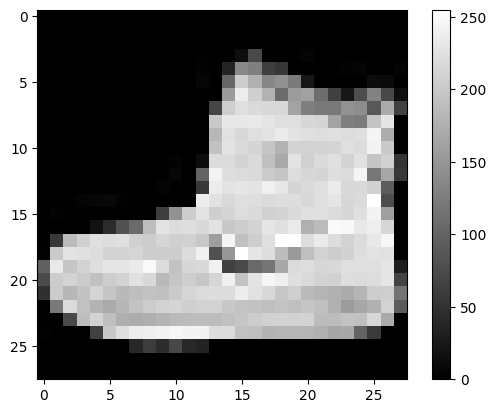

In [34]:
plt.imshow(X_train[0], cmap='gray')
plt.colorbar()
plt.show()

In [35]:
Y_train[0]

9

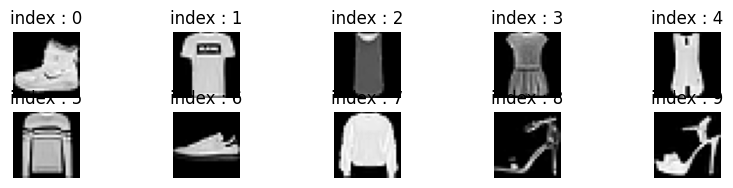

In [36]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(5,5,i+1)
    random_index = np.random.randint(0, len(X_train))
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'index : {i}')
    plt.axis('off')
plt.show()

In [37]:
## 정답을 바이너리화 함.
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [38]:
# CNN 모델 설계.
## 모델
input_Layer = tf.keras.layers.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(input_Layer)
x = tf.keras.layers.MaxPool2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), strides = 1, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
Out_Layer=tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0   

In [5]:
loss = tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
metrics = tf.keras.metrics.categorical_accuracy
model.compile(loss=loss,
              optimizer = optimizer,
              metrics= ['accuracy'])

In [6]:
# 모델 최적화 설정
MODEL_DIR = './CNN_Fasion_MNIST_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./CNN_Fasion_MNIST_model/{epoch:02d}-{val_loss:.4f}.hdf5"
callback_list=[tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True),
               tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]

In [7]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=50, batch_size=200, verbose=1, callbacks=callback_list)
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/50
233/240 [============================>.] - ETA: 0s - loss: 3.5243 - accuracy: 0.6119
Epoch 1: val_loss improved from inf to 1.26814, saving model to ./CNN_Fasion_MNIST_model/01-1.2681.hdf5
240/240 [==============================] - 6s 6ms/step - loss: 3.4594 - accuracy: 0.6156 - val_loss: 1.2681 - val_accuracy: 0.7518
Epoch 2/50
 37/240 [===>..........................] - ETA: 0s - loss: 1.2290 - accuracy: 0.7595

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


237/240 [============================>.] - ETA: 0s - loss: 1.0523 - accuracy: 0.7812
Epoch 2: val_loss improved from 1.26814 to 0.90421, saving model to ./CNN_Fasion_MNIST_model/02-0.9042.hdf5
240/240 [==============================] - 1s 5ms/step - loss: 1.0480 - accuracy: 0.7818 - val_loss: 0.9042 - val_accuracy: 0.8037
Epoch 3/50
236/240 [============================>.] - ETA: 0s - loss: 0.8055 - accuracy: 0.8142
Epoch 3: val_loss improved from 0.90421 to 0.74395, saving model to ./CNN_Fasion_MNIST_model/03-0.7439.hdf5
240/240 [==============================] - 1s 5ms/step - loss: 0.8050 - accuracy: 0.8141 - val_loss: 0.7439 - val_accuracy: 0.8237
Epoch 4/50
237/240 [============================>.] - ETA: 0s - loss: 0.6787 - accuracy: 0.8320
Epoch 4: val_loss improved from 0.74395 to 0.67188, saving model to ./CNN_Fasion_MNIST_model/04-0.6719.hdf5
240/240 [==============================] - 1s 5ms/step - loss: 0.6783 - accuracy: 0.8321 - val_loss: 0.6719 - val_accuracy: 0.8265
Epoch 

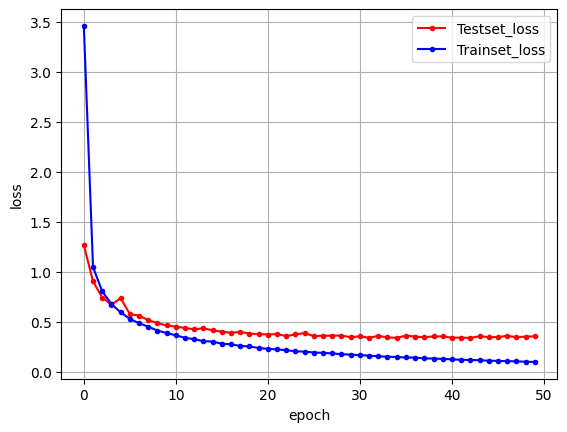

In [8]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
